In [4]:
import pandas as pd
from kacper.project.calculations import *
from kacper.project.data import *
from kacper.project.visualizations import *
import cProfile

## First step is to download data on bus movement. I chose here to download data from 10min on bus movement in Warsaw. The resulting file are saved in 'test.csv' file.

In [5]:
download_bus_data(4, outfilename='test_bus.csv')

Minutes until downloading data is completed: 4
Minutes until downloading data is completed: 3
Minutes until downloading data is completed: 2
Minutes until downloading data is completed: 1


## Now it is time to catch speeding bus drivers!

In [6]:
speeding_df = speeding('test_bus.csv', 50, from_file=True)

## Now we map the data on speeding buses on the map of Warsaw. The mapping function is universal - you just need a picture of the map and coordinates of it's edges.

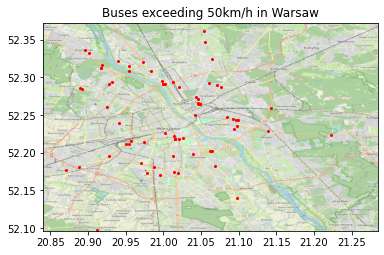

In [7]:
map_points(speeding_df, 'warsaw_map.png', (20.8404, 21.2846, 52.0964, 52.3727), 'speeders.png')

## Downloading data on bus stops

In [8]:
df_bus_stops = download_bus_stops()

## Now for each bust stop I'm adding bus lines with their schedule

In [9]:
df_of_schedule = add_bus_lines(df_bus_stops)

## Now we check the buses punctality. The results are printed in a form of a dict with 2 keys: punctual and late.

In [10]:
df_bus_data = pd.read_csv('test_bus.csv', index_col=0)
punctuality = late_buses(df_bus_data, df_of_schedule)

In [11]:
print(f"Example late buses: {punctuality['late'][:10]}, number of late buses found: {len(punctuality['late'])}")

Example late buses: [('138', '2', '13:50:00', '2.42min', '1.110754692918664km'), ('147', '1', '13:56:00', '5.82min', '1.2976770000602216km'), ('147', '1', '13:56:00', '4.63min', '1.2372712681986182km'), ('147', '1', '13:56:00', '3.72min', '1.2498861362804237km'), ('166', '6', '13:55:00', '5.87min', '1.3998494869122746km'), ('166', '6', '13:55:00', '3.53min', '1.1269420049333716km'), ('166', '6', '13:55:00', '2.62min', '1.0647998776531433km'), ('509', '2', '13:54:00', '4.58min', '1.3381355370069083km'), ('138', '5', '13:44:00', '5.43min', '1.0000781953822566km'), ('509', '10', '13:58:00', '5.65min', '1.3607758052815493km')], number of late buses found: 11373


In [12]:
print(f"Punctual buses: {punctuality['punctual'][:10]},  number of punctual buses found: {len(punctuality['punctual'])}")

Punctual buses: [('123', '07', '13:56:00', '5.5min', '0.6124274390276927km'), ('123', '07', '13:56:00', '4.45min', '0.6148584423847322km'), ('123', '07', '13:56:00', '3.45min', '0.7059522870572613km'), ('125', '7', '13:49:00', '0.23min', '0.13459981511396926km'), ('125', '7', '13:49:00', '1.38min', '0.00988695018501866km'), ('125', '7', '13:49:00', '2.47min', '0.2745476188042133km'), ('125', '7', '13:49:00', '3.38min', '0.527145520937282km'), ('138', '2', '13:50:00', '0.58min', '0.10089729813746459km'), ('138', '2', '13:50:00', '0.3min', '0.02800534935699797km'), ('138', '2', '13:50:00', '1.5min', '0.4437820756157497km')],  number of punctual buses found: 16634
